<a href="https://colab.research.google.com/github/Angana1/Stock-Price-Prediction-London-Metal-Exchange-/blob/main/westmetall_multivariate_lstm_Monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from matplotlib import pyplot as plt

# Getting Data

In [ ]:
lead=pd.read_csv('/content/Monthly Weighted Avg Lead Price.csv')
usdinr=pd.read_csv('/content/USDINR_monthlyAvg.csv')

In [ ]:
usdinr.head()

,Date,Close Monthly Average
0,Jan-08,39.245904
1,Feb-08,39.643000
2,Mar-08,40.080613
3,Apr-08,39.889666
4,May-08,41.944484


In [ ]:
# this is the data to be used as training data (no date column)
data = pd.DataFrame(lead, columns=['Weighted Average Price'])
data=pd.concat([data, usdinr['Close Monthly Average']], axis=1,ignore_index=True)
data.columns = ['Lead Monthly Avg', 'Exchange Rate Monthly Avg']
print(data.dtypes)
print(data)

Lead Monthly Avg             float64
Exchange Rate Monthly Avg    float64
dtype: object
     Lead Monthly Avg  Exchange Rate Monthly Avg
0         2601.678175                  39.245904
1         2797.112343                  39.643000
2         1802.000000                  40.080613
3         1802.000000                  39.889666
4         1802.000000                  41.944484
..                ...                        ...
156       2012.419036                  73.138439
157       2089.104842                  72.791140
158       1954.569200                  72.801716
159       1997.856000                  74.454233
160       2188.551802                  73.582459

[161 rows x 2 columns]


In [ ]:
All_dates = pd.to_datetime(lead['Date'],format="%b-%y")
print(All_dates.dtype)
print(All_dates)

datetime64[ns]
0     2008-01-01
1     2008-02-01
2     2008-03-01
3     2008-04-01
4     2008-05-01
         ...    
156   2021-01-01
157   2021-02-01
158   2021-03-01
159   2021-04-01
160   2021-05-01
Name: Date, Length: 161, dtype: datetime64[ns]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(data)
data_scaled = scaler.transform(data) #data_scaled is a list
print(data)
print(data_scaled)

     Lead Monthly Avg  Exchange Rate Monthly Avg
0         2601.678175                  39.245904
1         2797.112343                  39.643000
2         1802.000000                  40.080613
3         1802.000000                  39.889666
4         1802.000000                  41.944484
..                ...                        ...
156       2012.419036                  73.138439
157       2089.104842                  72.791140
158       1954.569200                  72.801716
159       1997.856000                  74.454233
160       2188.551802                  73.582459

[161 rows x 2 columns]
[[0.89416797 0.        ]
 [1.         0.01062492]
 [0.4611241  0.02233396]
 [0.4611241  0.01722488]
 [0.4611241  0.07220475]
 [0.46047429 0.09294865]
 [0.53165819 0.09351333]
 [0.52498612 0.09156006]
 [0.49458964 0.16679858]
 [0.2860001  0.24668089]
 [0.18629122 0.25772898]
 [0.         0.24739467]
 [0.09638967 0.25112248]
 [0.08084613 0.26278266]
 [0.15646096 0.31725089]
 [0.23839882 

In [ ]:
data_scaled.shape # 161 training examples, 2 columns in each(Lead price, USD/INR Exchange Rate)

(161, 2)

In [ ]:
type(data_scaled)

numpy.ndarray

In [ ]:
data_scaled_list = data_scaled.tolist()
print(type(data_scaled_list)) # type is list
print(len(data_scaled_list[0])) # 2 features

<class 'list'>
2


# Preparing Training and Test Data

In [ ]:
training_size=141
test_size=20

In [ ]:
#Making test data
testX=[]
testY=[]
testXdates=[]
testYdates=[]
n_future=5
n_past=10
for i in range(len(data_scaled_list)-test_size+n_past, len(data_scaled_list )-n_future):
    temp1=[]
    temp2=[]
    testX.append(data_scaled_list[i - n_past:i])
    testXdates.append(All_dates[i - n_past:i])
    for j in range(i,i+n_future):
      temp1.append(data_scaled_list[j][0])
      temp2.append(All_dates[j])
    testY.append(temp1)
    testYdates.append(temp2)

In [ ]:
print("Length of TestX:",len(testX))
print("Length of TestY:",len(testY))

Length of TestX: 5
Length of TestY: 5


In [ ]:
print("Length of TestXdates:",len(testXdates))
print("Length of TestYdates:",len(testYdates))

Length of TestXdates: 5
Length of TestYdates: 5


In [ ]:
testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

testX shape == (5, 10, 2).
testY shape == (5, 5).


Number of testing examples (series of 15) : 5

In [ ]:
# Making train data
trainX = []
trainY = []
trainXdates=[]
trainYdates=[]
n_future=5
n_past=10

In [ ]:
n_past, training_size - n_future +1

(10, 137)

In [ ]:
for i in range(n_past, training_size - n_future +1):
    temp=[]
    trainX.append(data_scaled_list[i - n_past:i])
    trainXdates.append(All_dates[i - n_past:i])
    for j in range(i,i+n_future):
      temp.append(data_scaled_list[j][0])
    
    trainY.append(temp)
    trainYdates.append(All_dates[i:i+n_future])
  

In [ ]:
print(len(trainX))
print(len(trainY))
print(len(trainXdates))
print(len(trainYdates))

127
127
127
127


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

trainX shape == (127, 10, 2).
trainY shape == (127, 5).


Number of training examples (series of 15) : 127

# Creating LSTM Model

In [ ]:
# Use this
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,2)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(5))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#ignore
model=Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#ignore
regressor =Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
from keras import optimizers

optimizer = optimizers.Adam(clipvalue=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
model.summary() 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 10, 50)            10600     
_________________________________________________________________
lstm_29 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
lstm_30 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 255       
Total params: 51,255
Trainable params: 51,255
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

In [ ]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=1000,batch_size=16,verbose=1)

Epoch 1/1000
8/8 [==============================] - 6s 170ms/step - loss: 0.3265 - accuracy: 0.0866 - val_loss: 0.1169 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.1095 - accuracy: 0.1260 - val_loss: 0.1103 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.0669 - accuracy: 0.2677 - val_loss: 0.0099 - val_accuracy: 0.6000
Epoch 4/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0527 - accuracy: 0.2756 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.0460 - accuracy: 0.1496 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0407 - accuracy: 0.1811 - val_loss: 0.0068 - val_accuracy: 0.2000
Epoch 7/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 0.1575 - val_loss: 0.0089 - val_accuracy: 0.6

Export trained model:

In [ ]:
filename="model.h5"
model.save(filename)

In [ ]:
from tensorflow.keras.models import load_model
loaded_model=load_model(filename)

Generate forecasts:

In [ ]:
forecast = loaded_model.predict(testX) #forecast 

In [ ]:
forecast = model.predict(testX) #forecast 

In [ ]:
forecast.shape

(5, 5)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(testY,forecast))
# Scaled RMSE values

0.06753505970801249

In [ ]:
forecast[0].shape #Prediction on first testing example

(5,)

In [ ]:
element=forecast[0]
element= np. reshape(element, (element.shape[0], 1))
print(element.shape)

(5, 1)


In [ ]:
forecast_copies = np.repeat(element, 2, axis=1)
forecast_copies.shape

(5, 2)

In [ ]:
y_pred_future = scaler.inverse_transform(forecast_copies)

In [ ]:
print(y_pred_future.shape)

(5, 2)


In [ ]:
#extracting required column from 2 repeated columns
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)
print(y_pred.shape)


(5,)


In [ ]:
print(y_pred) #predictions on first test example

[1764.3114 1705.5793 1734.2003 1836.6914 1913.4918]


# Preparing Unscaled Test data for visualisation of predictions


In [ ]:
print(data)
print(type(data))
print(data.shape)

     Lead Monthly Avg  Exchange Rate Monthly Avg
0         2601.678175                  39.245904
1         2797.112343                  39.643000
2         1802.000000                  40.080613
3         1802.000000                  39.889666
4         1802.000000                  41.944484
..                ...                        ...
156       2012.419036                  73.138439
157       2089.104842                  72.791140
158       1954.569200                  72.801716
159       1997.856000                  74.454233
160       2188.551802                  73.582459

[161 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
(161, 2)


In [ ]:
dataLead=data['Lead Monthly Avg']

In [ ]:
test_size #number of data points

20

In [ ]:
dataLead_list = dataLead.values.tolist()
print(dataLead_list)

[2601.678175, 2797.112343, 1802.0, 1802.0, 1802.0, 1800.8000260000001, 1932.2514010000002, 1919.9304550000002, 1863.798966, 1478.6081869999998, 1294.481297, 950.4675999, 1128.465077, 1099.761684, 1239.395415, 1390.705523, 1451.034369, 1671.34512, 1679.909568, 1916.011438, 2195.296487, 2240.709609, 2307.430887, 2328.488271, 2359.6682969999997, 2127.8501890000002, 2173.757048, 2261.099385, 1896.6256809999998, 1705.4655699999998, 1837.386732, 2069.193951, 2187.428754, 2382.550097, 2368.328173, 2426.179182, 2595.425094, 2595.308998, 2625.126786, 2719.9422210000002, 2427.840538, 2502.843121, 2677.2933780000003, 2399.913868, 2286.0870059999997, 1957.7660079999998, 1984.9174670000002, 2012.756325, 2085.0759399999997, 2123.661616, 2061.625692, 2063.169193, 2000.7096780000002, 1862.433443, 1871.6992890000001, 1895.665738, 2163.495925, 2137.181228, 2176.0087510000003, 2278.581847, 2334.878668, 2379.799591, 2174.872431, 2026.452779, 2027.6163649999999, 2103.857061, 2046.9753600000001, 2175.370258

In [ ]:
dataLead_list = dataLead_list[-test_size:]
print(dataLead_list)
print(len(dataLead_list)) #last 20 values of the entire Lead data points

[2185.288213, 2035.110116, 1898.9783760000003, 1922.7241199999999, 1871.7212260000001, 1739.584314, 1651.294321, 1622.391202, 1741.9496609999999, 1813.1038199999998, 1935.842196, 1878.6803719999998, 1773.9616850000002, 1918.8884239999998, 2001.907066, 2012.419036, 2089.104842, 1954.5692, 1997.856, 2188.551802]
20


In [ ]:
#Making test data
testX_unscaled=[]
testY_unscaled=[]
n_future=5
n_past=10
for i in range(len(dataLead_list)-n_future-n_past):
    temp=[]
    testX_unscaled.append(dataLead_list[i:i+n_past])
    for j in range(i+n_past,i+n_past+n_future):
      temp.append(dataLead_list[j])
    testY_unscaled.append(temp)

In [ ]:
testX_unscaled= np.array(testX_unscaled)
testY_unscaled= np.array(testY_unscaled)
print(testX_unscaled)
print(testX_unscaled.shape)
print(type(testX_unscaled))

print(testY_unscaled)
print(testY_unscaled.shape)
print(type(testY_unscaled))

[[2185.288213 2035.110116 1898.978376 1922.72412  1871.721226 1739.584314
  1651.294321 1622.391202 1741.949661 1813.10382 ]
 [2035.110116 1898.978376 1922.72412  1871.721226 1739.584314 1651.294321
  1622.391202 1741.949661 1813.10382  1935.842196]
 [1898.978376 1922.72412  1871.721226 1739.584314 1651.294321 1622.391202
  1741.949661 1813.10382  1935.842196 1878.680372]
 [1922.72412  1871.721226 1739.584314 1651.294321 1622.391202 1741.949661
  1813.10382  1935.842196 1878.680372 1773.961685]
 [1871.721226 1739.584314 1651.294321 1622.391202 1741.949661 1813.10382
  1935.842196 1878.680372 1773.961685 1918.888424]]
(5, 10)
<class 'numpy.ndarray'>
[[1935.842196 1878.680372 1773.961685 1918.888424 2001.907066]
 [1878.680372 1773.961685 1918.888424 2001.907066 2012.419036]
 [1773.961685 1918.888424 2001.907066 2012.419036 2089.104842]
 [1918.888424 2001.907066 2012.419036 2089.104842 1954.5692  ]
 [2001.907066 2012.419036 2089.104842 1954.5692   1997.856   ]]
(5, 5)
<class 'numpy.ndarra

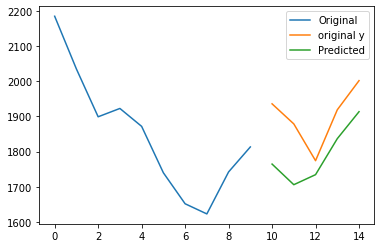

In [ ]:
#testX_unscaled[0] - original x test series
#testY_unscaled[0] - original y value
#y_pred - prediction
#on x axis: 10+5 = 15 days

x_axis=np.array([])
for i in range(15):
  x_axis=np.append(x_axis, i)

plt.plot(x_axis[0:10],testX_unscaled[0])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[10:15],testY_unscaled[0])
plt.plot(x_axis[10:15],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

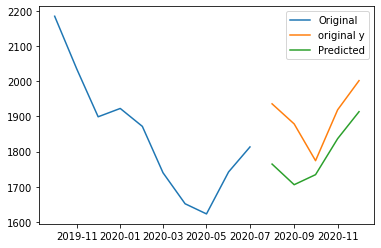

In [ ]:
#testX_unscaled[0] - original x test series
#testY_unscaled[0] - original y value
#y_pred - prediction
#on x axis: 10+5 = 15 days

plt.plot(testXdates[0],testX_unscaled[0])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[0],testY_unscaled[0])
plt.plot(testYdates[0],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

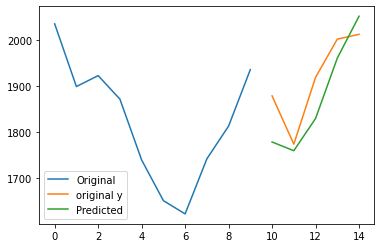

In [ ]:
#forecast[1]
test_num=1

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:10],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[10:15],testY_unscaled[test_num])
plt.plot(x_axis[10:15],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

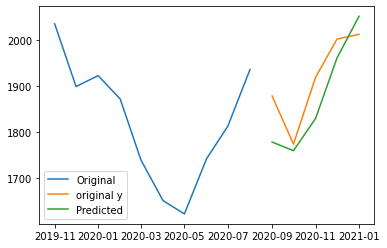

In [ ]:
#forecast[1]
test_num=1

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(testXdates[test_num],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY_unscaled[test_num])
plt.plot(testYdates[test_num],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

In [ ]:
print(y_pred)

[1995.6671 2017.7094 2028.6504 2041.9011 2073.3762]


In [ ]:
print(y_pred)

[1890.1875 1904.4059 1938.8877 1920.8733 1949.9019]


In [ ]:
print(testY_unscaled[1])

[1878.680372 1773.961685 1918.888424 2001.907066 2012.419036]


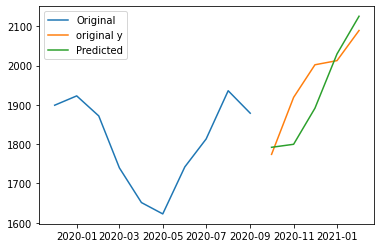

In [ ]:
#forecast[2]
test_num=2

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(testXdates[test_num],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY_unscaled[test_num])
plt.plot(testYdates[test_num],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

In [ ]:
print(y_pred)

[2062.1467 2076.3748 2081.4946 2083.398  2106.0903]


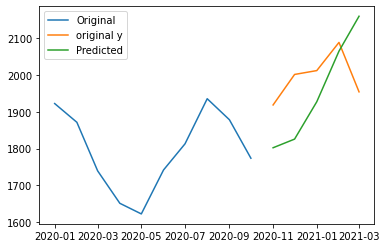

In [ ]:
#forecast[3]
test_num=3

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(testXdates[test_num],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY_unscaled[test_num])
plt.plot(testYdates[test_num],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

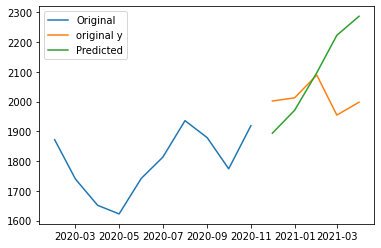

In [ ]:
#forecast[4]
test_num=4

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(testXdates[test_num],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY_unscaled[test_num])
plt.plot(testYdates[test_num],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(testY_unscaled[4],y_pred))
# Unscaled RMSE values

58.789541549093656